In [2]:
#Importation des packages
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from scipy.interpolate import CubicSpline

I/ THE HULL WHITE MODEL

1/ Prove the two relations in Equation (5).
(SEE REPORT)

2/ Assuming that equation (3) is satisfied show, using Itô Lemma, prove equation (4).
(SEE REPORT)

3/ Download the ZC yield curve from the ECB website and use it to calibrate the Nelson Siegel yield curve model.

In [3]:
###########Importation of the ZC yield curve from ECB############

Yield_curve = pd.read_excel(
    "Courbe-zero-coupon_31-janvier-2025.xlsx",
    sheet_name="Données",
    skiprows=1
)
Yield_curve["Taux ZC (actuar.)\n CNO"] = Yield_curve["Taux ZC (actuar.)\n CNO"]/100
display(Yield_curve)

,Maturité \n(années),Taux ZC (actuar.)\n CNO,Coefficient d'actualisation
0,1,0.023267,0.977262
1,2,0.034094,0.935147
2,3,0.022496,0.935439
3,4,0.022724,0.914041
4,5,0.022937,0.892802
5,6,0.023164,0.871624
6,7,0.023387,0.850589
7,8,0.023620,0.829637
8,9,0.023865,0.808755
9,10,0.024099,0.788102


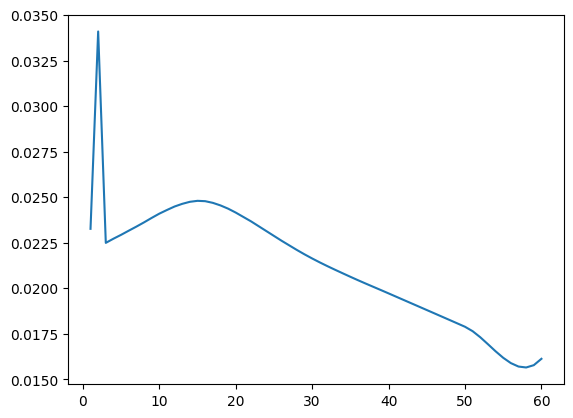

In [4]:
def lissage_Curve(data, colonne):
    x = np.array(data["Maturité \n(années)"])
    cs = CubicSpline(x, data[colonne])
    return cs

plt.plot(Yield_curve["Maturité \n(années)"], Yield_curve["Taux ZC (actuar.)\n CNO"])

Determine the set of optimal parameters to fit the initial yield curve.

In [5]:
#######Definition of the Nelson&Siegel Model#######################

def Nelson_Siegel_model(τ, Beta0, Beta1, Beta2, λ):
    first_term = Beta0
    second_term = Beta1*(1-np.exp(-τ/λ))/(τ/λ)
    third_term = Beta2*((1-np.exp(-τ/λ))/(τ/λ) - np.exp(-τ/λ))
    return first_term + second_term + third_term


################Definition of the Objective Function For the Optimisation###########

def objective(params, *args):
    Beta0, Beta1, Beta2, λ = params
    maturities, observed_values = args
    predicted_values = Nelson_Siegel_model(maturities, Beta0, Beta1, Beta2, λ)
    return np.sum((predicted_values - observed_values) ** 2)


###############Optimisation and Calculation of the Parameters###############

initial_guess = [0.1, 0.3, 0.4, 1]
result = optimize.minimize(objective, initial_guess, args=(Yield_curve['Maturité \n(années)'], Yield_curve['Taux ZC (actuar.)\n CNO']))
best_params = result.x
print("best_parameter: ", best_params)

best_parameter:  [ 0.01921993 -0.02527652  0.06767559  0.80055626]


<Axes: xlabel='Maturité \n(années)'>

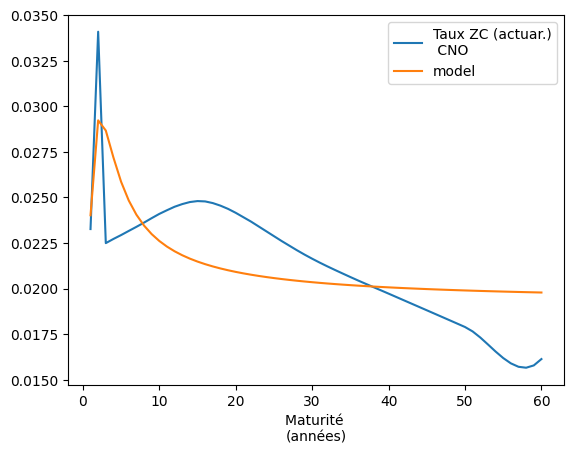

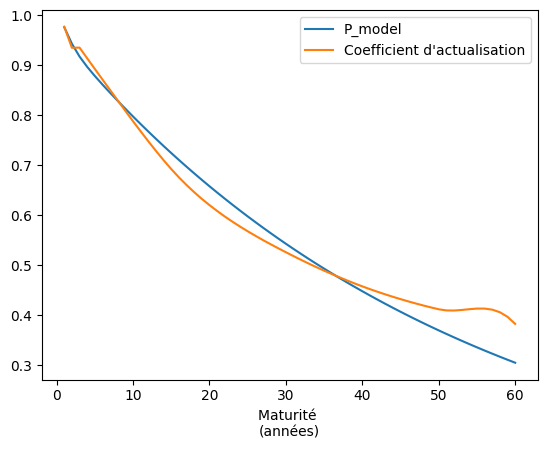

In [6]:
#############Building of the Yield Curve with Nelson&Siegel using the best Parameters##########################

Yield_curve["model"] = Yield_curve["Maturité \n(années)"].apply(Nelson_Siegel_model, args=tuple(best_params))
Yield_curve["P_model"] = np.exp(-Yield_curve["model"]*Yield_curve["Maturité \n(années)"])
Yield_curve.index =  Yield_curve["Maturité \n(années)"]

Yield_curve[['Taux ZC (actuar.)\n CNO', "model"]].plot()

Yield_curve[["P_model", "Coefficient d'actualisation" ]].plot()

4/ Using the definition of the instantaneous forward rate y(τ), let's derive its expression under the Nelson Siegel characterization of the yield curve.
(SEE REPORT)

5/ Determine θ(t) in order to fit the model to the initial yield curve using equation (3). (SEE REPORT)

6/ What is the economic foundation behind mean reversion in interest rate models ?

Mean reversion in interest rate models is economically grounded in the actions of central banks and the behavior of market fundamentals. Central banks actively adjust short-term rates to stabilize the economy, ensuring that rates do not stray too far from an equilibrium level. At the same time, long-term determinants—such as inflation expectations, real growth, and risk premiums—tend to change gradually, which naturally causes rates to revert to a historical mean. Moreover, investors react to large deviations by adjusting risk premiums and their expectations, further reinforcing the tendency for rates to return to an equilibrium. This economic behavior is reflected in models like Hull–White or Vasicek, where a mean-reverting drift term (typically expressed as a(b−rt​)) ensures that when rates are above the long-run average, there is a downward force, and when they are below, there is an upward push.

7/ Define the T-forward measure and derive the Hull and White Model dynamics under this measure. (SEE REPORT)

II/ SWAP VALUATION 

8/ Given the term structure of interest rates, construct a swap pricer that calculates the forward swap interest rate
 for an in fine bond.

In [7]:
#In this first case we assume that we will use directly the zero coupon obtained from the market that's mean that we set t=0. 
#witch is equivalent to the normal forward. We will try to suggest other P ofter r simulation
#Assumtion: we consider a swap payer. frequence: yearly, maturity: T: in year, year_fraction = 1, Nominal = 1000

ZC_Curve = lissage_Curve(Yield_curve, "Coefficient d'actualisation")

def VAN_F(T,K:float, Nominal=1000):
    payments_path_fix = np.array([Nominal*K]*T)
    Actualisation = np.array([float(ZC_Curve(i+1)) for i in range(T)])
    return np.sum(payments_path_fix*Actualisation)
    
    
def VAN_V(T, year_fraction=1, Nominal=1000):
    payments_path_var = [Nominal*(1/year_fraction)*(float(ZC_Curve(i))/float(ZC_Curve(i+1))-1) for i in range(1,T)]
    payments_path_var.insert(0,Nominal*(1/year_fraction)*(1/float(ZC_Curve(1))-1))
    Actualisation = np.array([float(ZC_Curve(i+1))  for i in range(T)])
    return np.sum(payments_path_var*Actualisation)


def swap_pricer(T):
    VAN_ = VAN_V(T)
    optim = optimize.minimize(lambda k: (VAN_ -VAN_F(T,float(k)))**2, 0.003, method ="Powell")
    return optim.x[0]

In [8]:
taux_swap = swap_pricer(10)
print("VAN_fixe:", VAN_F(10,taux_swap))
print("VAN_Var:", VAN_V(10))
print("le taux swap pour ce swap de maturité 10 ans et de fréquence annuelle est:",taux_swap)

VAN_fixe: 211.8978275574402
VAN_Var: 211.89782755743988
le taux swap pour ce swap de maturité 10 ans et de fréquence annuelle est: 0.024070000000000136


C:\Users\lydie\AppData\Local\Temp\ipykernel_17548\1537112.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  optim = optimize.minimize(lambda k: (VAN_ -VAN_F(T,float(k)))**2, 0.003, method ="Powell")


9/ Compare the obtained valuation with the theoretical value (using the exact formula for the swap rate).

In [9]:
#Assumption: T_alpha = 0, T_Betha = maturité
def formule_theorique_swap(T_alpha, T_Betha, year_fraction=1):
    sum_ZC = np.sum((1/year_fraction)*np.array([float(ZC_Curve(i+1))  for i in range(T_Betha)]))
    # float(ZC_Curve(T_alpha) = 1 si T_alpha=0
    tau = (1-float(ZC_Curve(T_Betha)))/sum_ZC
    return tau

print("la valeur du taux en utilisant la formule théorique est:",formule_theorique_swap(0, 10))

la valeur du taux en utilisant la formule théorique est: 0.024070000000000105


10/ How to extend the swap pricer to an amortizing loans ?

In [10]:
#we assume a basic constant amortissement based on the lenght of the contract. we can add a amortisement parameter also
def VAN_F_generalized(T,K:float, Nominal_init=1000):
    Nominal = np.array([Nominal_init*(1-i/T) for i in range(T)])
    payments_path_fix = Nominal*K
    Actualisation = np.array([float(ZC_Curve(i+1)) for i in range(T)])
    return np.sum(payments_path_fix*Actualisation)

def VAN_V_generalized(T, year_fraction=1, Nominal_init=1000):
    Nominal = np.array([Nominal_init*(1-i/T) for i in range(T)])
    payments_path_var = [Nominal[i]*(1/year_fraction)*(float(ZC_Curve(i))/float(ZC_Curve(i+1))-1) for i in range(1,T)]
    payments_path_var.insert(0,Nominal[0]*(1/year_fraction)*(1/float(ZC_Curve(1))-1))
    Actualisation = np.array([float(ZC_Curve(i+1))  for i in range(T)])
    return np.sum(payments_path_var*Actualisation)

def swap_pricer_generalized(T):
    VAN_ = VAN_V_generalized(T)
    optim = optimize.minimize(lambda k: (VAN_ -VAN_F_generalized(T,float(k)))**2, 0.003, method ="Powell")
    return optim.x[0]

In [11]:
taux_swap = swap_pricer_generalized(10)
print("VAN_fixe:", VAN_F_generalized(10,taux_swap))
print("VAN_Var:", VAN_V_generalized(10))
print("le taux swap pour ce swap de maturité 10 ans et de fréquence annuelle est:",taux_swap)

VAN_fixe: 119.6600433841337
VAN_Var: 119.66004338413377
le taux swap pour ce swap de maturité 10 ans et de fréquence annuelle est: 0.023892555648280953


C:\Users\lydie\AppData\Local\Temp\ipykernel_17548\3593222154.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  optim = optimize.minimize(lambda k: (VAN_ -VAN_F_generalized(T,float(k)))**2, 0.003, method ="Powell")


III/ CAP VALUATION

11/ Determine the cap value with a Monte Carlo simulation under the risk neutral measure.

In [12]:
#Simulation of Interest Rate
#les paramètres sont les paramètres obtenue après l'optimisation pour fiter le model de siegel et la courbe zero coupon et le les paramètre donnée par le proejt
Betha_0, Betha_1, Betha_2, λ, a, Sigma = 0.02752314, 0.01360691, -0.0280299, 1.90172148, 0.1, 0.01

def instantaneous_forward(t, betha_0 = Betha_0, betha_1 = Betha_1, betha_2 = Betha_2,λ = λ):
    return betha_0 + betha_1*np.exp(-t/λ) + betha_2*(t/λ)*np.exp(-t/λ) 


def Nelson_with_fix_param(τ):
    return Nelson_Siegel_model(τ, Betha_0, Betha_1, Betha_2, λ)


def theta(t, a = a, betha_0 = Betha_0, betha_1 = Betha_1, betha_2 = Betha_2, λ = λ):
     return a*betha_0 + betha_1*np.exp(-t/λ)*(a-1/λ) + betha_2*np.exp(-t/λ)*((1/λ)-(t/λ**2)+(a*t/λ)) + Sigma**2/(2*a)*(1-np.exp(-2*a*t))

    
def A(t, T, a = a, Sigma=Sigma):
    return ((np.exp(-Nelson_with_fix_param(T)*T)/np.exp(-Nelson_with_fix_param(t)*t))*np.exp(Phi(t,T, a)*instantaneous_forward(T)-(Sigma**2)/4*(a*(1-np.exp(-2*a*t)*Phi(t,T, a)**2))))


def Phi(t,T,a = a):
    return (1-np.exp(-a*(T-t)))/a


def P(t, T, rt, a = a, Sigma=Sigma):
    if t!=0:
        return A(t, T)*np.exp(-Phi(t,T)*rt)
    return np.exp(-Nelson_with_fix_param(T)*rt)


def Simulation_Hull_white(T, S, N_Obs, N_Sim, frquence = 1, a = a, Sigma = Sigma, r0=0.03):
    Nb_payement = int((S)/frquence)
    dt = T/N_Obs
    trajectoire = {}
    P_dic = {}
    P_specific =[]
    for i in range(N_Sim):
        trajectoire[str("simulation") + str(i)] = []
        P_dic[str("simulation")+str(i)] = []
        for j in range(N_Obs + 1):
            if j == 0:
                trajectoire[str("simulation") + str(i)].append(r0)
            else:
                trajectoire[str("simulation") + str(i)].append(trajectoire[str("simulation") + str(i)][j-1] + (theta((j-1)*dt) - a * trajectoire[str("simulation") + str(i)][j-1])*dt + Sigma*np.random.randn()*np.sqrt(dt))
        P_specific.append(P(T, S+T, trajectoire[str("simulation") + str(i)][-1]))
        for k in range(Nb_payement+1):
            P_dic[str("simulation")+str(i)].append(P(T, T+k*frquence,trajectoire[str("simulation") + str(i)][int(T/dt)]))            
    
    simu_taux = pd.DataFrame(trajectoire)
    simul_P = pd.DataFrame(P_dic)
    return simu_taux, P_dic, P_specific

<Axes: >

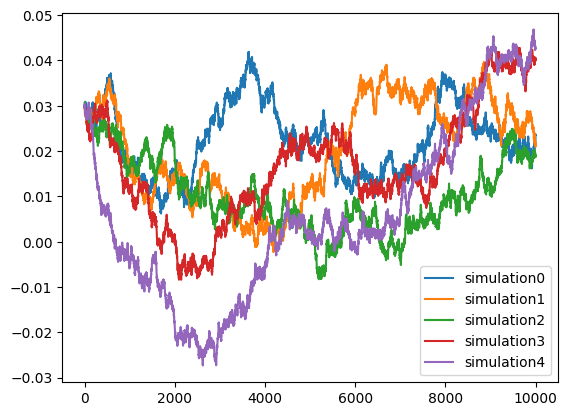

In [13]:
Simulation_Hull_white(10, 2, 10000, 5)[0].plot()

<Axes: >

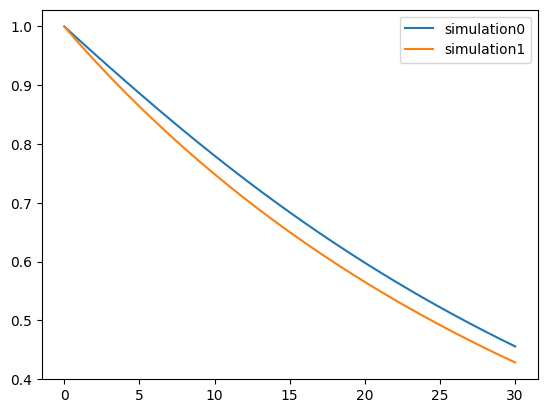

In [14]:
simul_P = pd.DataFrame(Simulation_Hull_white(10, 30, 1000, 2)[1])
simul_P.plot()

In [15]:
# assumptions: nous supposons ici que les maturité et expiry sont passé en année directement donc nous n'avons pas besoin de divisé par 365.
# egalement nous supposons que en passant le S l'on tienne compte directement du T ce qui fait que le S ne peut être inférieur au T. le S est compté à partir de today et non à partir de la date T. l'on peut le modifé afin qu'il fonctionne de l'auttre manière également
def Caplet(T, S, N_Obs, N_Sim, K, frquence = 1, Nominal = 1):
    rate_frame, P, P_matu = Simulation_Hull_white(T, S, N_Obs, N_Sim, frquence)
    rate_actualisation = np.sum(rate_frame)
    P_matu = np.array(P_matu)
    L = 1/(S)*(1-P_matu)/P_matu
    Payofff = np.maximum(0,L-K)*(S)*Nominal
    Payofff_first_actualisation = Payofff * P_matu
    Payoff_last_actualisation = np.exp(-rate_actualisation*(T/N_Obs))*Payofff_first_actualisation
    Prix = np.mean(Payoff_last_actualisation)
    return Prix

In [16]:
# T=1, S=10 soit une maturité du produit de 10 ans, K=0.02, N_obs= 1000, N_simulation = 1000
print("le prix d'un caplet dont les paramètres sont indiqué dans le commentaire ci-dessus sont:", Caplet(1, 10, 1000, 1000, 0.01))

le prix d'un caplet dont les paramètres sont indiqué dans le commentaire ci-dessus sont: 0.0769026966203396


C:\Users\lydie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [17]:
def Cap(T, S, N_Obs, N_Sim, K, frquence=1, Nominal = 1):
    Nbre_payement =  int((S)/frquence)
    Prix =0
    for i in range(Nbre_payement):
        Prix += Caplet(T+i*frquence, T+(i+1)*frquence, N_Obs, N_Sim, K, frquence)
    return Prix

In [18]:
# T=1, S=10 soit une maturité du produit de 10 ans, K=0.02, N_obs= 1000, N_simulation = 1000? fréquence = annual
print("le prix d'un Cap dont les paramètres sont indiqué dans le commentaire ci-dessus sont:", Cap(1, 10, 1000, 1000, 0.01, 1))

le prix d'un Cap dont les paramètres sont indiqué dans le commentaire ci-dessus sont: 0.6412911040428046


12/ Conduct the valuation under the T- forward measure

In [19]:
#let's simulate the rate under the T_forward mesure
# nous effectuerons la simulation en utilisant l'EDS obtenue à partir de la mesure T-Forward
def Simulation_Hull_white_under_T_forward(T, S, N_Obs, N_Sim, a = a, Sigma = Sigma, frquence = 1, r0=0.03):
    Nb_payement = int((S)/frquence)
    dt = T/N_Obs
    trajectoire = {}
    P_dic = {}
    P_specific =[]
    
    for i in range(N_Sim):
        trajectoire[str("simulation") + str(i)] = []
        P_dic[str("simulation")+str(i)] = []
        for j in range(N_Obs + 1):
            if j == 0:
                trajectoire[str("simulation") + str(i)].append(r0)
            else:
                trajectoire[str("simulation") + str(i)].append(  trajectoire[str("simulation") + str(i)][j-1]  +  (theta((j-1)*dt) - a * trajectoire[str("simulation") + str(i)][j-1]-Sigma**2*Phi(dt*(j-1), T))*dt + Sigma*np.random.randn()*np.sqrt(dt)  )
                
        P_specific.append(P(T, T+S, trajectoire[str("simulation") + str(i)][int(T/dt)]))
        
        for k in range(Nb_payement+1):
            P_dic[str("simulation")+str(i)].append(P(T, T+k*frquence,trajectoire[str("simulation") + str(i)][int(T/dt)]))            
    simu_taux = pd.DataFrame(trajectoire)
    simul_P = pd.DataFrame(P_dic)
    return simu_taux, P_dic, P_specific


<Axes: >

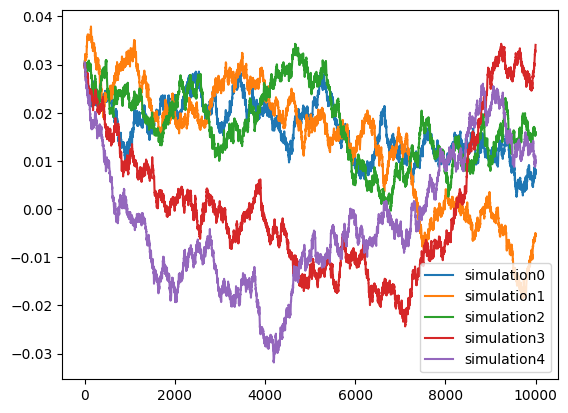

In [20]:
Simulation_Hull_white_under_T_forward(10, 2, 10000, 5)[0].plot()

<Axes: >

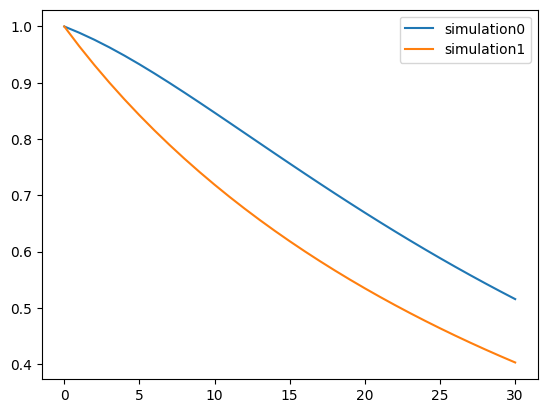

In [21]:
pd.DataFrame(Simulation_Hull_white_under_T_forward(10, 30, 1000, 2)[1]).plot()

In [22]:
def Caplet_under_T(T, S, N_Obs, N_Sim, K, frquence = 1, Nominal = 1):
    rate_frame, P, P_matu = Simulation_Hull_white(T, S, N_Obs, N_Sim, frquence)
    rate_actualisation = np.sum(rate_frame)
    P_matu = np.array(P_matu)
    L = (1/(S))*(1-P_matu)/P_matu
    Payofff = np.maximum(0,L-K)*(S)*Nominal
    Payofff_first_actualisation = Payofff * P_matu
    Payoff_last_actualisation = np.exp(-rate_actualisation*(T/N_Obs))*Payofff_first_actualisation
    Prix = np.mean(Payoff_last_actualisation)
    return Prix

In [23]:
# T=1, S=10 soit une maturité du produit de 10 ans, K=0.02, N_obs= 1000, N_simulation = 1000
print("le prix d'un caplet dont les paramètres sont indiqué dans le commentaire ci-dessus sont:", Caplet_under_T(1, 10, 1000, 1000, 0.01))

le prix d'un caplet dont les paramètres sont indiqué dans le commentaire ci-dessus sont: 0.07713779994116338


C:\Users\lydie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [24]:
def Cap_Under_T(T, S, N_Obs, N_Sim, K, frquence=1, Nominal = 1):
    Nbre_payement =  int((S)/frquence)
    Prix = 0
    for i in range(Nbre_payement):
        Prix += Caplet_under_T(T+i*frquence, T+(i+1)*frquence, N_Obs, N_Sim, K)
    return Prix

In [25]:
# T=1, S=1 soit une maturité du produit de 1 ans, K=0.02, N_obs= 1000, N_simulation = 1000, frquence semestrielle
print("le prix d'un Cap dont les paramètres sont indiqué dans le commentaire ci-dessus sont:", Cap_Under_T(1, 10, 1000, 1000, 0.01))

le prix d'un Cap dont les paramètres sont indiqué dans le commentaire ci-dessus sont: 0.6526621002005153


13/ Determine a closed-form value for the cap. 

In [26]:
def B(T,S,a=a,Sigma = Sigma):
    return (1-np.exp(-a*(S-T)))/a


def Sigma_tilde(t, T, S, Sigma=Sigma, a=a):
    return Sigma*np.sqrt((1-np.exp(-2*a*(T-t)))/(2*a))*B(T,S+T)
            

def h_func(t,T,S,K, Sigma_tild, rt):
    return (1/Sigma_tild)*np.log(P(t, S+T, rt)/(P(t, T, rt)*K)) + Sigma_tild/2


def ZBP(t, T, K, S, rt):
    Sigma_tild = Sigma_tilde(t, T, S)
    h = h_func(t,T,S,K, Sigma_tild, rt)
    ZBP = -P(t, S+T, rt)*sc.stats.norm.cdf(-h) + K*P(t, T, rt)*sc.stats.norm.cdf(-h+Sigma_tild)
    return ZBP


def form_ana_Caplet(t, T, S, K, rt):
    K_prime = 1/(1+K*(S))
    Put_value = ZBP(t, T, K_prime, S, rt)
    return Put_value/K_prime


def form_ana_Cap(t, T, S, K, rt, frquence):
    Nbre_payement =  int(S/frquence)
    Prix = 0
    for i in range(Nbre_payement):
        Prix += form_ana_Caplet(t, T+i*frquence, frquence, K, rt)
    return Prix

In [27]:
t=0
T=1
S=10
K=0.02
rt=0.03
print("le prix d'un caplet dont les paramètres sont indiqué en utilisant la formule analytics est:", form_ana_Caplet(t, T, S, K, rt))

le prix d'un caplet dont les paramètres sont indiqué en utilisant la formule analytics est: 2.234169432766388e-05


IV/ SWAPTION VALUATION

14/ Propose a Monte Carlo simulation for the pricing of the European Swaption.

In [28]:
def Swaption(T, S, K, N_Obs, N_Sim, frquence=1):
    rate_frame, P, P_matu = Simulation_Hull_white(T, S, N_Obs, N_Sim, frquence)
    P_matu = np.array(P_matu)
    P_dataframe = pd.DataFrame(P)
    rate_some = np.sum(rate_frame)*(T/N_Obs)
    P_sum = np.sum(P_dataframe[P_dataframe.index>0]).values
    S_alpha_betha = (1-P_matu)/np.array(P_sum)
    Payoff = np.maximum(S_alpha_betha-K, 0)*frquence*1*P_sum
    Payoff_last_actualisation = np.exp(-rate_some)*Payoff
    Prix = np.mean(Payoff_last_actualisation) 
    return Prix

In [29]:
t=0
N_Obs = 1000
N_Sim = 1000
T=1
S=10
K=0.02
rt=0.03
frquence= 1
print("le prix d'un Swaption dont les paramètres sont indiqué en utilisant la formule analytics est:", Swaption(T, S, K, N_Obs, N_Sim, frquence=1))

le prix d'un Swaption dont les paramètres sont indiqué en utilisant la formule analytics est: 0.013163311382671648


15/ Propose a Monte Carlo simulation for the pricing of the Bermudan Swaption.

In [30]:
def Bermudean_Swaption_Hull_White(T, S,  N_obs,  N_simu, K, frquence=1, N=1):
    rate_frame, P, P_matu = Simulation_Hull_white(T, S, N_Obs, N_Sim, frquence)    
    P_specific = np.array(P_matu)
    P_frame = pd.DataFrame(P)
    rate_frame = pd.DataFrame(rate_frame)
    Nbre_payement = int((S - T) / frquence)
    delta_ = N / Nbre_payement
    Nominals = np.array([N - i * delta_ for i in range(Nbre_payement)])
    rate_some = np.sum(rate_frame.values) * (T / N_obs)    
    V = [0]*(Nbre_payement+1)  
    print(len(V))
    S_alpha_betha = (1 - P_specific) / np.sum(P_frame[P_frame.index > 0]).values
    V[-1] = np.maximum(S_alpha_betha - K, 0)
    
    Payoff_inter = np.maximum(S_alpha_betha - K, 0)
    for i in range(Nbre_payement - 1, -1, -1):
        X = rate_frame.values[1:, i]
        y = V[i + 1] * np.exp(-rate_some)
        print(X.shape)
        print(len(y))
        coef = np.polyfit(X, y, 2)
        Reg = np.poly1d(coef)
        Current_Expectation = Reg(rate_frame.values[:, i])
        V[i] = np.maximum(Payoff_inter[i], Current_Expectation)
    Prix = V[0]
    
    return Prix

16/ Why is the correlation among interest rates important in the valuation of swaptions ?

The correlation among interest rates is crucial in swaption valuation because the underlying swap is composed of multiple forward rates across different maturities. These forward rates move together, and their co-movement determines the overall volatility of the swap. This effective swap volatility directly influences the option’s price. Moreover, the correlation impacts convexity adjustments, which are essential for accurate pricing. In essence, accurately capturing the correlation among rates ensures that the aggregated behavior of the forward rates is realistically represented, ultimately leading to more precise swaption valuations.

17/ Explain why the 1-factor HW model does not capture the correlation among interest rate models.

In a one-factor model, a single source of risk (a single Brownian motion) drives the evolution of all interest rates. This means that regardless of their maturity whether short, medium, or long-term, all rates evolve in a perfectly correlated manner, showing no individual behavioral diversity.
In reality, different parts of the yield curve react differently to economic shocks (for instance, monetary policy might have a more pronounced effect on short-term rates than on long-term rates, and vice versa). To capture these differences, it is necessary to incorporate multiple risk factors, each capable of distinctly influencing specific segments of the curve.
Thus, the one-factor Hull–White model can only reproduce a trivial correlation structure (perfect correlation among all rates) and does not allow for modeling the behavioral discrepancies observed in real markets. This is why two-factor models or higher are often used when it is important to capture the complex correlation structure between different segments of the yield curve.